## ML Analysis of Platforms

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

In [211]:
df = pd.read_csv('../Datasets/games-features.csv')
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df = df.loc[df['ReleaseDate'].notnull()]
df = df.loc[df['GenreIsNonGame'] == False]
df = df.loc[df['SteamSpyOwners'] > 0]
df = df.drop(columns=['QueryID', 'ResponseID', 'QueryName', 'PackageCount',
                      'AchievementHighlightedCount', 'AchievementCount', 'ControllerSupport', 'PCReqsHaveMin',
                      'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
                      'MacReqsHaveRec', 'SupportEmail', 'SupportURL', 'ExtUserAcctNotice',
                      'HeaderImage', 'LegalNotice', 'Website', 'PCMinReqsText',
                      'PCRecReqsText', 'LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText',
                      'MacRecReqsText'])

df.loc[:, 'SteamSpyOwnersLog'] = df['SteamSpyOwners'].apply(lambda x: 0 if x == 0 else np.log(x))
df['NumPlatforms'] = df['PlatformWindows'].astype(int) + df['PlatformLinux'].astype(int) + df['PlatformMac'].astype(int)

print(df.shape)
df.head()

(10219, 55)


,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,RecommendationCount,PublisherCount,...,PriceFinal,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,Reviews,SupportedLanguages,SteamSpyOwnersLog,NumPlatforms
0,Counter-Strike,2000-11-01,0,0,1,0,88,0,68991,1,...,9.99,Play the worlds number 1 online action game. E...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,Play the worlds number 1 online action game. E...,,,English French German Italian Spanish Simplifi...,16.383021,3
1,Team Fortress Classic,1999-04-01,0,0,1,0,0,0,2439,1,...,4.99,One of the most popular online action games of...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,One of the most popular online action games of...,,,English French German Italian Spanish,15.501750,3
2,Day of Defeat,2003-05-01,0,0,1,0,79,0,2319,1,...,4.99,Enlist in an intense brand of Axis vs. Allied ...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Enlist in an intense brand of Axis vs. Allied ...,,,English French German Italian Spanish,15.846432,3
3,Deathmatch Classic,2001-06-01,0,0,1,0,0,0,888,1,...,4.99,Enjoy fast-paced multiplayer gaming with Death...,http://cdn.akamai.steamstatic.com/steam/apps/4...,,Enjoy fast-paced multiplayer gaming with Death...,,,English French German Italian Spanish,15.830276,3
4,Half-Life: Opposing Force,1999-11-01,0,0,1,0,0,0,2934,1,...,4.99,Return to the Black Mesa Research Facility as ...,http://cdn.akamai.steamstatic.com/steam/apps/5...,,Return to the Black Mesa Research Facility as ...,,,English French German Korean,15.501817,3


In [212]:
df = df[df['PlatformWindows'] == True]

In [213]:
outcome, predictors = patsy.dmatrices("SteamSpyOwnersLog ~ NumPlatforms + PlatformLinux + PlatformMac", df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      SteamSpyOwnersLog   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     34.25
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           1.50e-15
Time:                        10:16:37   Log-Likelihood:                -21999.
No. Observations:               10218   AIC:                         4.400e+04
Df Residuals:                   10215   BIC:                         4.402e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.33

### Resdiplots

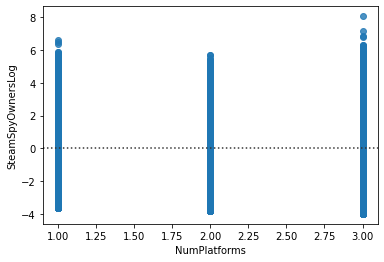

In [214]:
sns.residplot(x='NumPlatforms', y='SteamSpyOwnersLog', data=df)

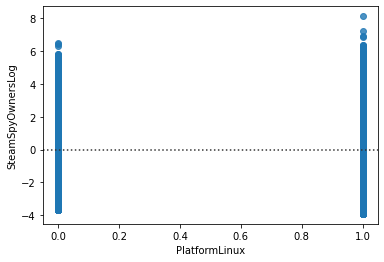

In [215]:
sns.residplot(x='PlatformLinux', y='SteamSpyOwnersLog', data=df)

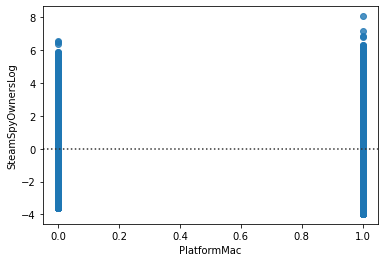

In [216]:
sns.residplot(x='PlatformMac', y='SteamSpyOwnersLog', data=df)

### NumPlatforms vs SteamSpyOwnersLog

R^2 score:  0.004483000484332256
Mean Squared Error:  4.386579397392732


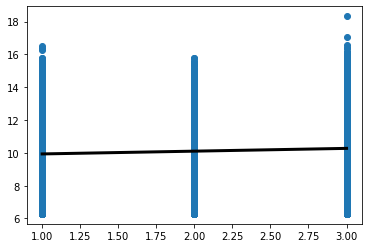

In [217]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df['NumPlatforms']), 
                                                    np.array(df['SteamSpyOwnersLog']), test_size = 0.3)

reg = LinearRegression()
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))
#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_test, predicted))

#Plot regression line and scatter
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.show()

### PlatformLinux vs SteamSpyOwnersLog

R^2 score:  0.0030527137420194306
Mean Squared Error:  4.357583288685547


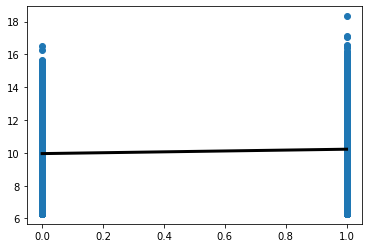

In [218]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df['PlatformLinux']), 
                                                    np.array(df['SteamSpyOwnersLog']), test_size = 0.3)

reg = LinearRegression()
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))

#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_test, predicted))

#Plot regression line and scatter
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.show()

### PlatformMac vs SteamSpyOwnersLog

R^2 score:  0.005433664502996538
Mean Squared Error:  4.279191414834053


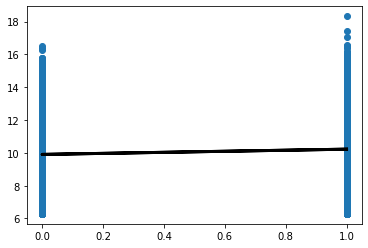

In [219]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df['PlatformMac']), 
                                                    np.array(df['SteamSpyOwnersLog']), test_size = 0.3)

reg = LinearRegression()
reg.fit(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1)))
predicted = reg.predict(np.reshape(x_test, (-1,1)))

#R^2
print('R^2 score: ', reg.score(np.reshape(x_train, (-1,1)), np.reshape(y_train, (-1, 1))))
#Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_test, predicted))

#Plot regression line and scatter
plt.plot(x_test, predicted, color = 'black', linewidth = 3)
plt.scatter(x = x_train, y= y_train)
plt.show()

### NumPlatforms, PlatformLinux, PlatformMac vs SteamSpyOwnersLog

In [221]:
x_train, x_test, y_train, y_test = train_test_split(df[['PlatformLinux', 'PlatformMac']], 
                                                    np.array(df['SteamSpyOwnersLog']), test_size = 0.3)
reg = LinearRegression()
#Fit
reg.fit(x_train, np.reshape(y_train, (-1, 1)))
predicted = reg.predict(x_test)
#R^2
print('R^2 score: ', reg.score(x_train, np.reshape(y_train, (-1, 1))))
#Mean Squared Error
print('Mean Squared Error: ', mean_squared_error(y_test, predicted))

R^2 score:  0.00647628197912864
Mean Squared Error:  4.335004909064249


### Looks like very little correlation